In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-recommendation/yes.py
/kaggle/input/spotify-recommendation/good.json
/kaggle/input/spotify-recommendation/dislike.json
/kaggle/input/spotify-recommendation/no.py
/kaggle/input/spotify-recommendation/data.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 

# **Importing The Dataset**

In [3]:
spotify_df = pd.read_csv('../input/spotify-recommendation/data.csv')
spotify_df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
5,0.778,0.6320,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.8270,140.951,224029,4,1
6,0.666,0.5890,0,-8.405,0,0.3240,0.5550,0.000000,0.1140,0.7760,74.974,146053,4,1
7,0.922,0.7120,7,-6.024,1,0.1710,0.0779,0.000040,0.1750,0.9040,104.964,161800,4,1
8,0.794,0.6590,7,-7.063,0,0.0498,0.1430,0.002240,0.0944,0.3080,112.019,247460,4,0
9,0.853,0.6680,3,-6.995,1,0.4470,0.2630,0.000000,0.1040,0.7450,157.995,165363,4,1


In [4]:
spotify_df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.143,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.882,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.616,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.413,110.547,190239,5,1
194,0.747,0.6660,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4,1


In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [6]:
spotify_df.shape

(195, 14)

In [7]:
spotify_df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [8]:
spotify_df['liked'].value_counts()

1    100
0     95
Name: liked, dtype: int64

# **Data Pre-Processing**
**Creating Train & Test sets**

In [9]:
X = spotify_df.drop('liked' , axis = 1)
y = spotify_df['liked']
y.head(10)

0    0
1    1
2    0
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: liked, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , roc_auc_score , confusion_matrix

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)
print("the shapes of x-train and x-test are : " , X_train.shape , X_test.shape)
print("the shapes of y-train and y-test are : " , y_train.shape , y_test.shape)

the shapes of x-train and x-test are :  (136, 13) (59, 13)
the shapes of y-train and y-test are :  (136,) (59,)


Text(0.5, 1.0, 'Correlation HeatMap')

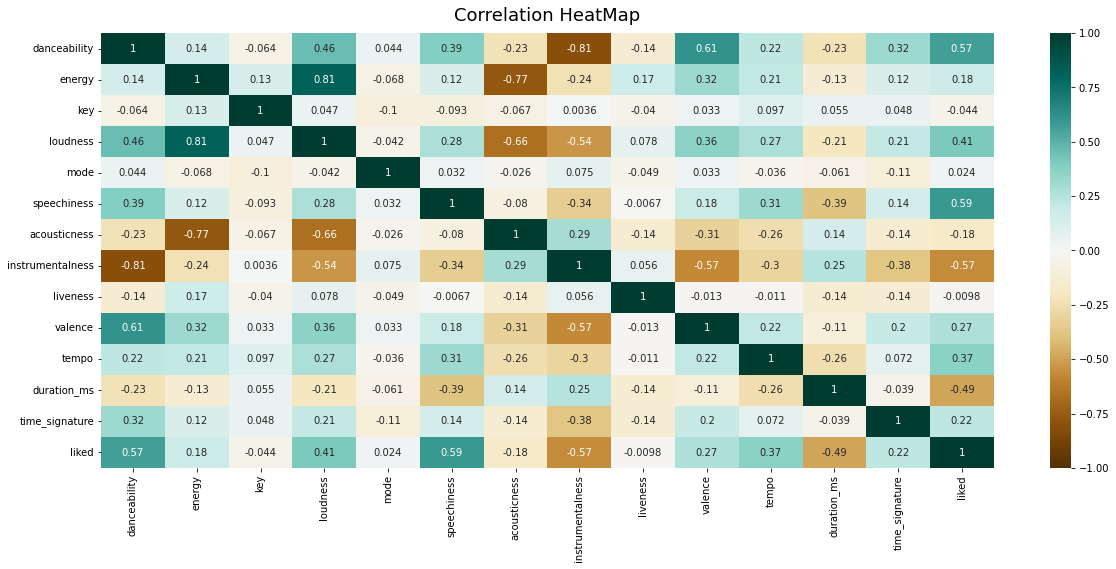

In [12]:
plt.figure(figsize=(20,8))
heatmap = sns.heatmap(spotify_df.corr() , vmin=-1 , vmax=1 ,annot=True , cmap='BrBG')
heatmap.set_title('Correlation HeatMap' , fontdict = {'fontsize' : 18} , pad=12)

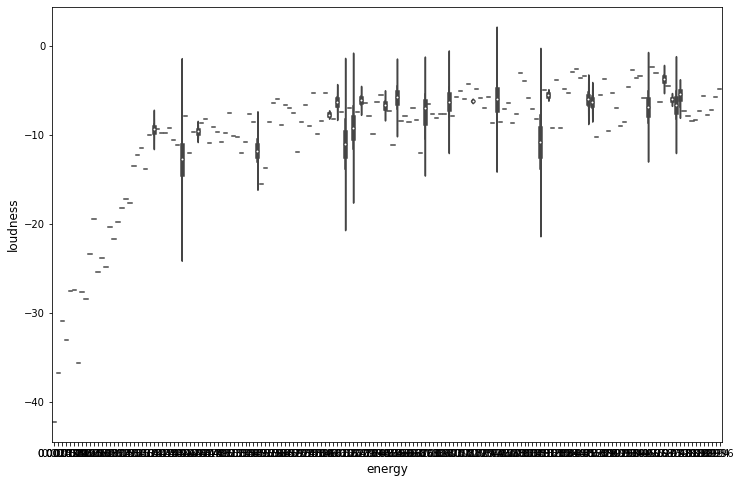

In [13]:
plt.figure(figsize=(12,8))
sns.violinplot(x='energy', y='loudness', data=spotify_df)
plt.xlabel('energy', fontsize=12)
plt.ylabel('loudness', fontsize=12)
plt.show()

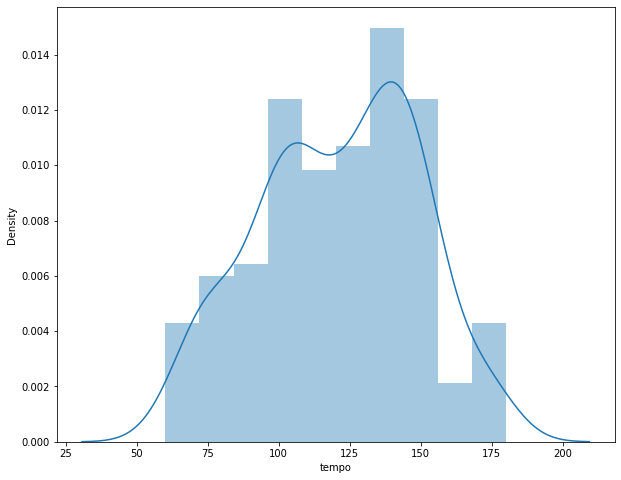

In [14]:
f, ax = plt.subplots(figsize=(10,8))
x = spotify_df['tempo']
ax = sns.distplot(x, bins=10)
plt.show()

In [15]:
san = spotify_df

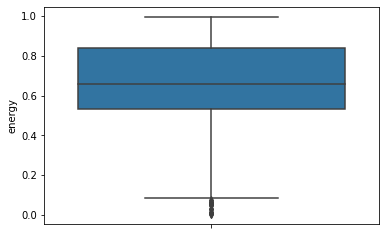

In [16]:
sns.boxplot( y = spotify_df["energy"])
plt.show()

In [17]:
san['energy'] = pd.cut(spotify_df['energy'], bins=10)


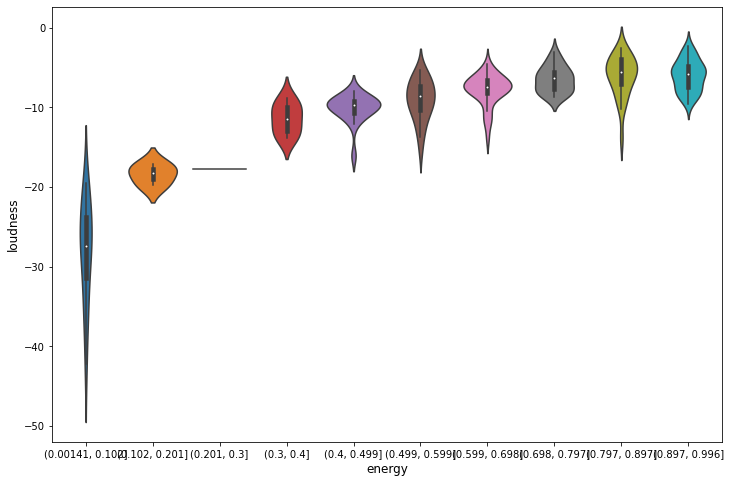

In [18]:
plt.figure(figsize=(12,8))
sns.violinplot(x='energy', y='loudness', data=san)
plt.xlabel('energy', fontsize=12)
plt.ylabel('loudness', fontsize=12)
plt.show()

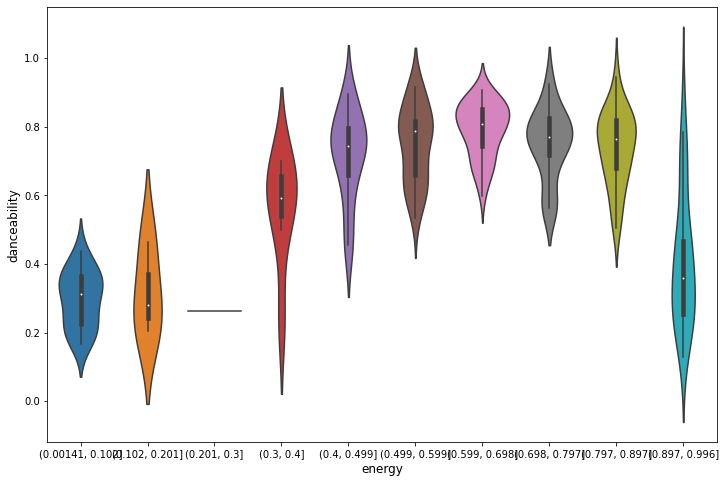

In [19]:
plt.figure(figsize=(12,8))
sns.violinplot(x='energy', y='danceability', data=san)
plt.xlabel('energy', fontsize=12)
plt.ylabel('danceability', fontsize=12)
plt.show()

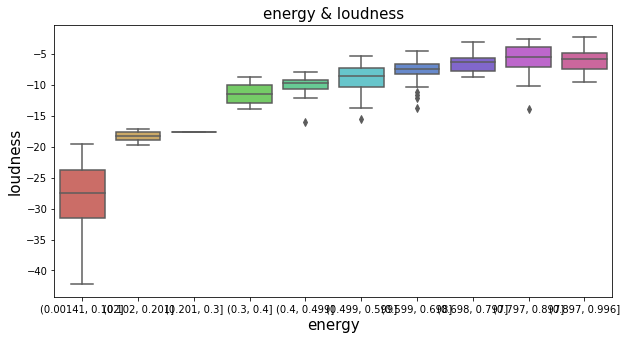

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='energy',y='loudness',data=san,palette='hls')
plt.title('energy & loudness',fontsize=15)
plt.xlabel('energy',fontsize=15)
plt.ylabel('loudness',fontsize=15)
plt.show()

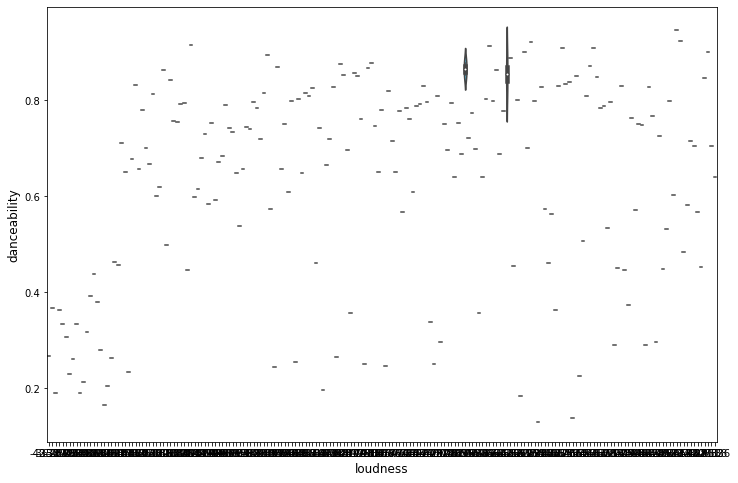

In [21]:
plt.figure(figsize=(12,8))
sns.violinplot(x='loudness', y='danceability', data=san)
plt.xlabel('loudness', fontsize=12)
plt.ylabel('danceability', fontsize=12)
plt.show()

In [22]:
def violinplot(df, a, b):
    plt.figure(figsize=(5,4))
    plt.subplot(1,1,1)
    sns.violinplot(x=a,y=b,data=df)
def plot(df, x_col, y_col, color_field):
    cl = df[color_field].unique()
    col = ['orange', 'blue', 'red', 'yellow', 'black', 'brown']

    fig = df[df[color_field] == cl[0]].plot(kind='scatter', x=x_col, y=y_col, color=col[0], label=cl[0])
    
    for i in range(len(cl)-1):
        df[df[color_field] == cl[i+1]].plot(kind='scatter', x=x_col, y=y_col, color=col[i+1], label=cl[i+1], ax=fig)

    fig.set_xlabel(x_col)
    fig.set_ylabel(y_col)
    fig.set_title(x_col + " vs. " + y_col)
    fig=plt.gcf()
    fig.set_size_inches(12, 7)
    plt.show()

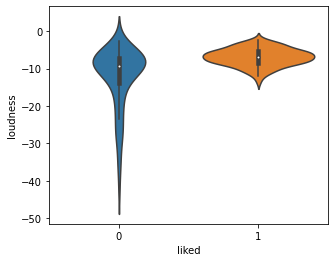

In [23]:
violinplot(spotify_df, 'liked', 'loudness')

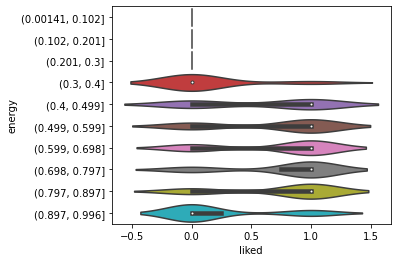

In [24]:
violinplot(spotify_df, 'liked', 'energy')

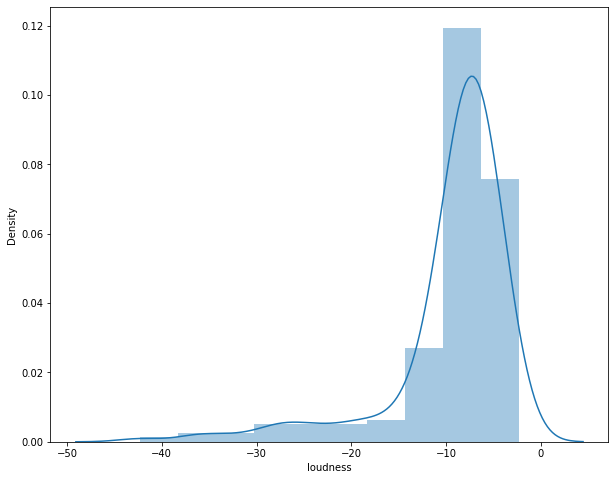

In [25]:
f, ax = plt.subplots(figsize=(10,8))
x = spotify_df['loudness']
ax = sns.distplot(x, bins=10)
plt.show()

# **Building ML Models**
**Decision Tree Classifier**

In [26]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train , y_train)
y_preds_dt = dt_clf.predict(X_test)

In [27]:
print("Accuracy Score of the Decision Tree Model" , accuracy_score(y_test , y_preds_dt))
print("ROC AUC score of the Decision Tree Model is : " , roc_auc_score(y_test , y_preds_dt))

Accuracy Score of the Decision Tree Model 0.7796610169491526
ROC AUC score of the Decision Tree Model is :  0.7782258064516128


Text(0.5, 1.0, 'Confusin Matrix Of Decision Tree Model')

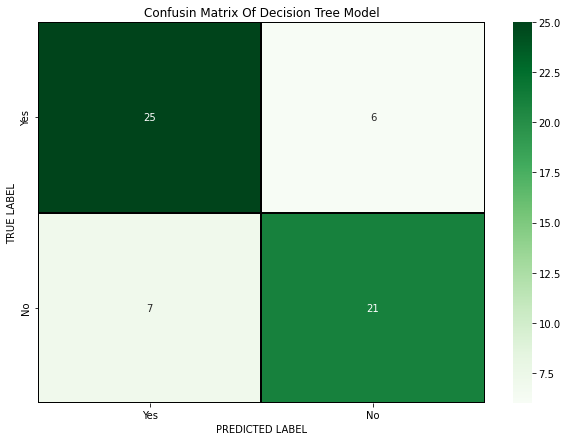

In [28]:
#confusion Matrix of Decision Tree Model 
cm  = confusion_matrix(y_test , y_preds_dt)

x_axis_labels = ["Yes" , "No"]
y_axis_labels = ["Yes" , "No"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm , annot=True, linewidths=0.2 , linecolor="black" , fmt=".0f" , ax=ax , cmap="Greens" , 
           xticklabels=x_axis_labels , yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusin Matrix Of Decision Tree Model")

# **Ensemble Models**
**Random Forest Classifier**

In [29]:
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , BaggingClassifier , AdaBoostClassifier

In [30]:
rf_clf = RandomForestClassifier(n_estimators=100)
extratree_clf = ExtraTreesClassifier(n_estimators=100)
bg_clf = BaggingClassifier(n_estimators=100)
ada_clf = AdaBoostClassifier(n_estimators=100)

In [31]:
rf_clf.fit(X_train , y_train)
extratree_clf.fit(X_train , y_train)
bg_clf.fit(X_train , y_train)
ada_clf.fit(X_train , y_train)

AdaBoostClassifier(n_estimators=100)

In [32]:
y_preds_rf = rf_clf.predict(X_test)
y_preds_et = extratree_clf.predict(X_test)
y_preds_bg = bg_clf.predict(X_test)
y_preds_ada = ada_clf.predict(X_test)

In [33]:
print("Accuracy Score of the Random Forest Model", accuracy_score(y_test, y_preds_rf))
print("Accuracy Score of the Extre Tree Classifier Model", accuracy_score(y_test, y_preds_et))
print("Accuracy Score of the Bagging Classifier Model", accuracy_score(y_test, y_preds_bg))
print("Accuracy Score of the AdaBoost Classifier Model", accuracy_score(y_test, y_preds_ada))

Accuracy Score of the Random Forest Model 0.8983050847457628
Accuracy Score of the Extre Tree Classifier Model 0.9152542372881356
Accuracy Score of the Bagging Classifier Model 0.847457627118644
Accuracy Score of the AdaBoost Classifier Model 0.9491525423728814


In [34]:
print("ROC AUC Score of the Random Forest Model", roc_auc_score(y_test, y_preds_rf))
print("ROC AUC Score of the Extre Tree Classifier Model", roc_auc_score(y_test, y_preds_et))
print("ROC AUC Score of the Bagging Classifier Model", roc_auc_score(y_test, y_preds_bg))
print("ROC AUC Score of the AdaBoost Classifier Model", roc_auc_score(y_test, y_preds_ada))

ROC AUC Score of the Random Forest Model 0.8980414746543778
ROC AUC Score of the Extre Tree Classifier Model 0.9193548387096775
ROC AUC Score of the Bagging Classifier Model 0.8479262672811061
ROC AUC Score of the AdaBoost Classifier Model 0.9516129032258064


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier Model')

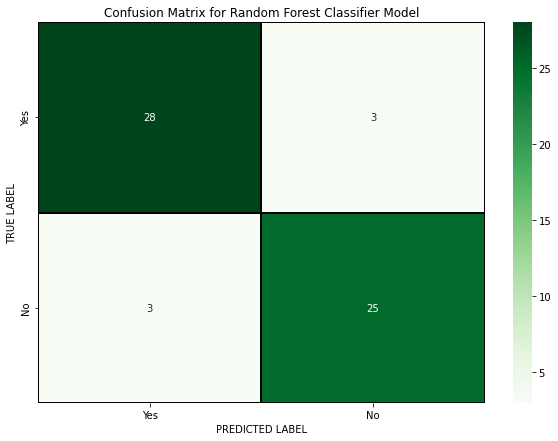

In [35]:
#Confusion Matrix of Random Forest Classifier Model.
cm = confusion_matrix(y_test, y_preds_rf)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Extra Tree Classifier Model')

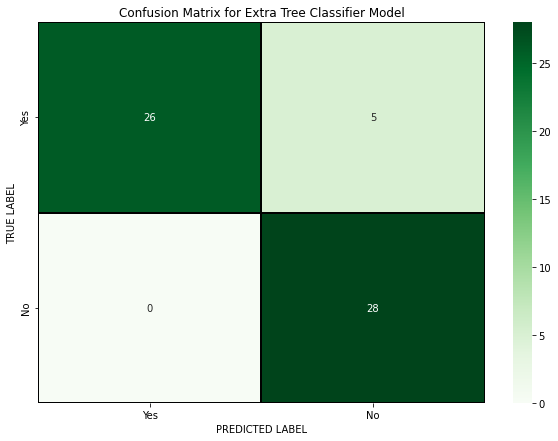

In [36]:
#Confusion Matrix of Extra Tree Classifier Model.
cm = confusion_matrix(y_test, y_preds_et)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Extra Tree Classifier Model')

In [37]:
from sklearn import metrics #for checking the model accuracy

rate2 = metrics.accuracy_score(y_test,y_preds_rf) * 100
print(rate2)

89.83050847457628


Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier Model')

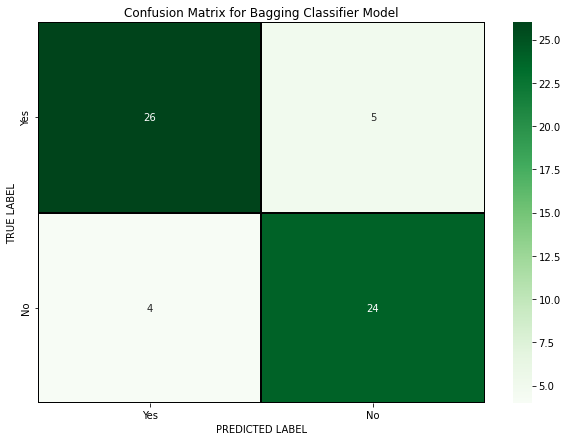

In [38]:
#Confusion Matrix of Bagging Classifier Model.
cm = confusion_matrix(y_test, y_preds_bg)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost Classifier Model')

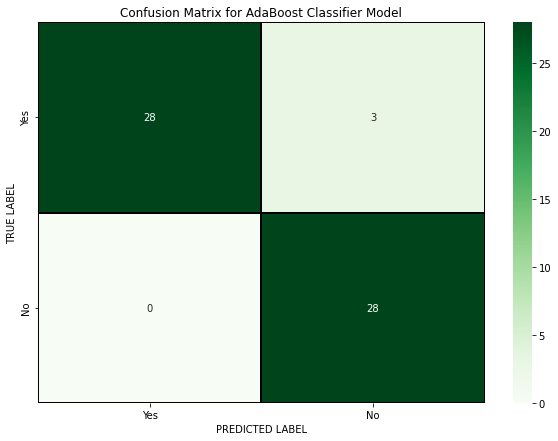

In [39]:
#Confusion Matrix of AdaBoost Classifier Model.
cm = confusion_matrix(y_test, y_preds_ada)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier Model')

# **LGBM Classifier**

In [40]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train , y_train)
y_preds_lgbm = lgbm_clf.predict(X_test)

In [41]:
print("Accuracy Score of the LGBM Model", accuracy_score(y_test, y_preds_lgbm))

Accuracy Score of the LGBM Model 0.9322033898305084


Text(0.5, 1.0, 'Confusion Matrix for LGBM Classifier Model')

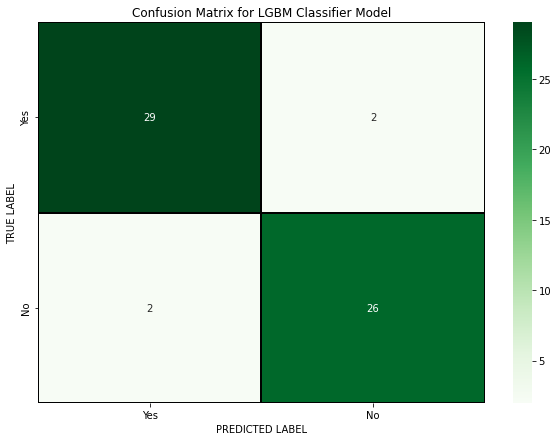

In [42]:
#Confusion Matrix of LGBM Classifier Model.
cm = confusion_matrix(y_test, y_preds_lgbm)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LGBM Classifier Model')

# **Saving the best model**

In [43]:
from joblib import dump
MODEL_NAME = "Spotify-recommender.pkl"
dump(extratree_clf , MODEL_NAME)

['Spotify-recommender.pkl']